# Gemaakt op 07/05/2025 door martijn

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st

### Portfolio assignment 11
20 min: Do a Numerical VS Categorical bivariate analysis on the penguins dataset.
- Choose one of the categorical columns: species, island or sex
- use .groupby('<columnname>').mean() too look at the means of the numerical columns. Does it look like there is a difference between categories?
- Use the seaborn barplot to plot the mean and confidence. Create this plot for each of the numerical columns (bill_length_mm	bill_depth_mm, flipper_length_mm, body_mass_g)
- For each of the plots, write a conclusion: Is there a statistically significant difference for this numerical column for each category?
- Optional: Repeat this proces for the other two categorical columns

In [18]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [19]:
penguins.groupby('species').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


ik heb `numeric_only=True` hierbij gezet omdat hij anders crashed, dit is omdat penguins meerdere categorische colommen heeft. Iris heeft er maar 1 en daarom had het voorbeeld niet `numeric_only=True`

ik zie hierbij soms wel didelijk verschillen, maar soms ook niet.

<Axes: xlabel='species', ylabel='bill_length_mm'>

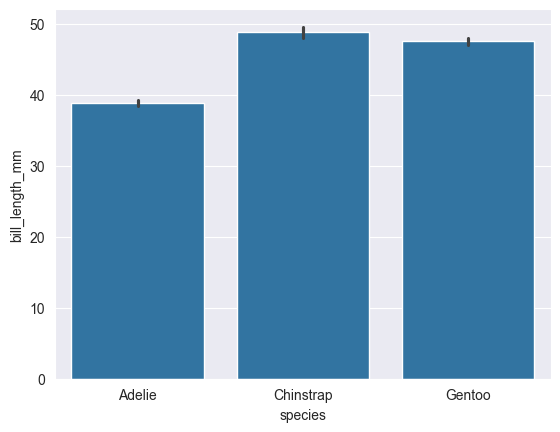

In [20]:
sns.barplot(y="bill_length_mm", x="species", data=penguins)

bij deze gaan we even iets meer onderzoeken om te kijken hoe het zit.

Bij de onderstaande code berekenen we de mean met een 95% confidence value per species type. Dit printen we ook gelijk

In [22]:
confidence = 0.95
grouped = penguins.groupby("species")["bill_length_mm"]


for species, values in grouped:
    values = values.dropna()
    n = len(values)
    mean = values.mean()
    sem = st.sem(values)
    h = st.t.interval(confidence, n-1, loc=mean, scale=sem)
    print(h)

(np.float64(38.36312349769243), np.float64(39.21965795926121))
(np.float64(48.025551407651875), np.float64(49.64209565117166))
(np.float64(46.954783427502186), np.float64(48.05497267005878))


## conclusie bill_length_mm
we zien hier dat er overlap is, dit betekent dat er niet echt een significant verschil is tussen de species en de bill_length_mm. Dat betekent dus dat we niet de species kunnen herkennen aan de bill_length_mm. We kunnen alleen Adelie herkennen aan bill_length_mm.


<Axes: xlabel='species', ylabel='bill_depth_mm'>

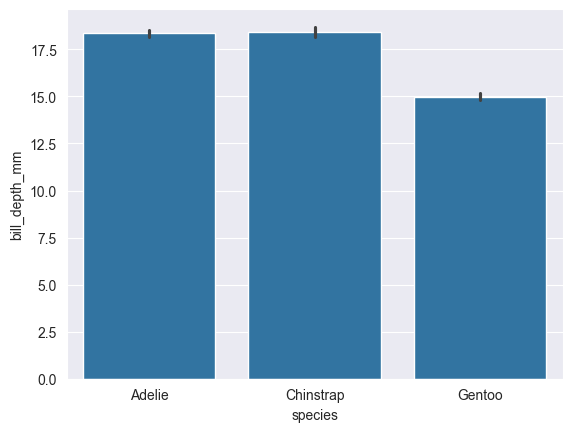

In [11]:
sns.barplot(y="bill_depth_mm", x="species", data=penguins)

## conclusie bill_depth_mm
We kunnen hier duidelijk zien dat er overlap is tussen de species, dus weer kunnen we niet de species herkennen aan bill_depth_mm, behalve dat Gentoo we wel kunnen herkennen hieraan.

<Axes: xlabel='species', ylabel='flipper_length_mm'>

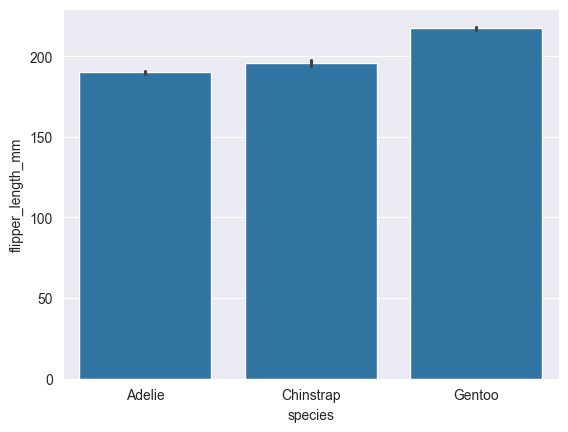

In [12]:
sns.barplot(y="flipper_length_mm", x="species", data=penguins)

hier is een onclusie weer wat lasitger, dus we gaan weer het zelfde doen als bij numeric test 1, bill_length_mm:

In [24]:
confidence = 0.95
grouped = penguins.groupby("species")["flipper_length_mm"]


for species, values in grouped:
    values = values.dropna()
    n = len(values)
    mean = values.mean()
    sem = st.sem(values)
    h = st.t.interval(confidence, n-1, loc=mean, scale=sem)
    print(h)

(np.float64(188.9021179338864), np.float64(191.00516683432554))
(np.float64(194.0972432317915), np.float64(197.54981559173788))
(np.float64(216.02945928932266), np.float64(218.34452445051474))


## conclusie flipper_length_mm
we kunnen hier zien dat de confidense ranges niet overlappen, dit betekent dat we de species kunnen herkennen aan de flipper_length_mm. maar eht is wel close, dus je moet geen meetfoutjes maken. En je moet in gedachten houden dat er ook outliers kunnen zien. Maar generally speaking: we kunnen de species herkennen aan flipper_length_mm

<Axes: xlabel='species', ylabel='body_mass_g'>

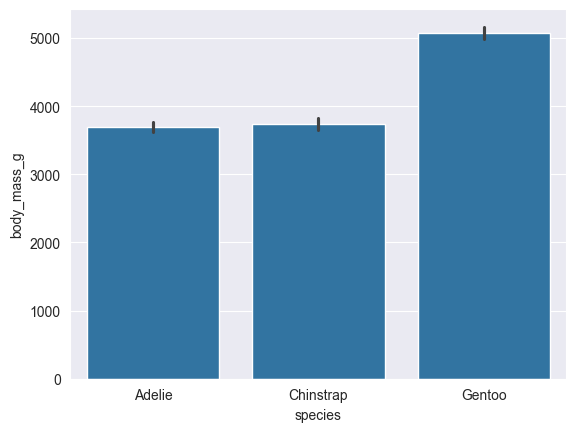

In [13]:
sns.barplot(y="body_mass_g", x="species", data=penguins)

## conclusie body_mass_g
ja we kunnen heir duidelijk zien dat we gentoo kunnen herkennen als we een zware penguin hebben, maar de andere 2 species kunnen we niet identificeren bij body_mass_g. Dit is omdat de confidence ranges duidelijk overlappen.